23 / Octubre / 2023

## **Especulación sobre contratos a futuro del S&P 500.**

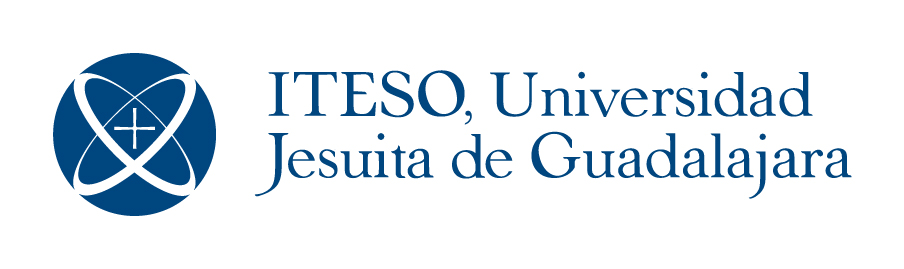

## **Integrantes del Equipo**
- Diego Lozoya Morales / diego.lozoya@iteso.mx / 745345
- Luis Eduardo Jiménez del Muro / eduardo.jimenez@iteso.mx / 746484
- Ivanna Herrera Ibarra / ivanna.herrera@iteso.mx / 744614

## **Objetivo general**
Comprobar si es posible realizar especulación sobre los contratos a futuro (en este caso del índice S&P 500).

## **Objetivos específicos a alcanzar**
- Descargar el histórico de dos años del índice del S&P 500.
- Investigar los contratos de futuros disponibles en la bolsa de CME group (Chicago Mercantile Exchange).
- Transformar los puntos del índice a rendimientos logarítmicos $r=ln(\frac{v_a}{v_p})$ donde:
  - $v_a=$ Valor actual
  - $v_p=$ Valor pasado
- Simular el comportamiento de los rendimientos del índice a dos meses.
- Obtener la predicción de los puntos del índice al final de los dos meses, así como la probabilidad de que este resultado suceda.
- Comparar contra el precio pactado del futuro para evaluar si vale la pena tomar esa posición y si es posible la especulación.

## **Modelo que representa el problema**
- Al realizar la transformación de los datos con la fórmula de rendimiento logarítmico, el modelo del problema es una distribución de probabilidad normal $N(μ,σ)$
, donde:
  - Media: $μ= \frac{\sum_{i=1}^{n}x_i}{n}$
  - Desviación estándar: $σ= \sqrt{\frac{\sum_{i=1}^{n}(x_i-μ)^2}{n-1}}$
- Las limitaciones que tiene nuestro proyecto son que al ser una simulación no podremos saber el resultado exacto de la ganancia o pérdida que se podría tener, sin embargo, se trata de especulación y nos ayuda a conocer la probabilidad de que pase ese resultado y saber si aceptar el contrato.

## **Introducción a los contratos de Futuros**
Según Hull, J. (2008) "Un contrato de futuros es un acuerdo para comprar o vender un activo en una fecha específica en el futuro a un precio determinado". En estos contratos existen 2 posiciones: larga y corta.

- **Posición larga:** Obligación de comprar un activo a un precio determinado en una fecha específica.
- **Posición corta:** Obligación de vender un activo a un precio determinado en una fecha específica.

En nuestro caso nos interesaron los contratos de futuros sobre el índice S&P 500 a dos meses en donde el precio spot (precio a futuro del índice) es de 4356.75.

## **Solución**
Con ayuda de la librería de yahoo finance, descargamos los datos históricos de los últimos 2 años (17 de Octubre de 2021 hasta el 17 de octubre de 2023) del cierre ajustado sobre los puntos del índice del S&P 500.

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def getClose(name, start, end):
    return yf.download(name, start, end)["Adj Close"]

data = getClose("^GSPC", "2021-10-16", "2023-10-17")
data

[*********************100%%**********************]  1 of 1 completed


Date
2021-10-18    4486.459961
2021-10-19    4519.629883
2021-10-20    4536.189941
2021-10-21    4549.779785
2021-10-22    4544.899902
                 ...     
2023-10-10    4358.240234
2023-10-11    4376.950195
2023-10-12    4349.609863
2023-10-13    4327.779785
2023-10-16    4373.629883
Name: Adj Close, Length: 502, dtype: float64

Para poder trabajar con los datos, es necesario que se asemejen a una distribución normal, por lo que transformamos los datos mediante el rendimiento diario.

<Axes: ylabel='Frequency'>

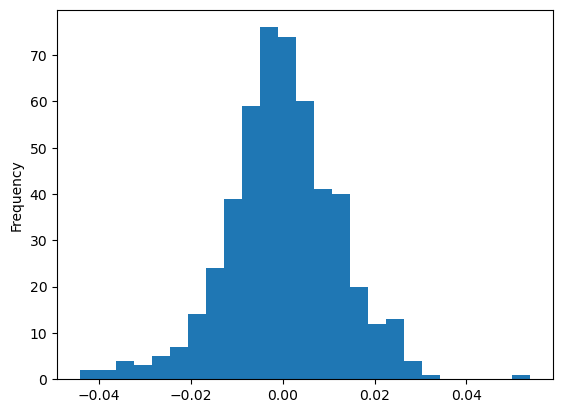

In [16]:
R = np.log(data / data.shift())
R.plot.hist(bins=25)

Una vez teniendo los datos organizados como una distribución normal, es posible trabajar con ellos. Estamos comparando con un futuro a 2 meses, por lo que necesitamos simular los siguientes 2 meses de puntos cotizados del índice.

In [17]:
def sim_R(media, std, fecha_inicio, dias, N):
    R_sim = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(start=fecha_inicio, periods=dias)
    return pd.DataFrame(index=fechas, data=R_sim)

sim = sim_R(R.mean(), R.std(), "2023-10-17", 59, 1000000)
puntos_simulados = (1 + sim).cumprod()*data[-1]
puntos_simulados

,0,1,2,3,4,5,6,7,8,9,...,999990,999991,999992,999993,999994,999995,999996,999997,999998,999999
2023-10-17,4357.527106,4369.394188,4310.531423,4437.860041,4409.620452,4296.690803,4408.229734,4490.585032,4306.578372,4322.607980,...,4422.592135,4434.434817,4274.483289,4392.331215,4404.347558,4361.949098,4354.597643,4456.270689,4350.397559,4374.530989
2023-10-18,4387.791314,4379.537204,4390.832356,4404.114688,4389.279000,4275.269050,4389.056021,4482.762987,4431.647575,4272.037040,...,4347.077103,4372.003848,4283.276337,4398.409955,4421.114383,4366.467648,4351.288286,4505.253895,4244.297590,4491.959431
2023-10-19,4378.602564,4297.820936,4365.426191,4307.252797,4421.032791,4269.124504,4420.482331,4467.167158,4392.828003,4299.596113,...,4359.812740,4391.016125,4181.884152,4417.779709,4392.884371,4366.779782,4311.726393,4423.725308,4178.864420,4425.510564
2023-10-20,4349.583648,4273.623175,4338.676334,4300.969794,4509.129605,4326.759986,4514.375203,4480.127253,4508.935708,4341.397683,...,4336.078520,4460.898322,4115.382882,4375.254053,4366.792769,4241.128937,4326.732747,4385.706341,4024.437608,4301.574428
2023-10-21,4204.781560,4194.968253,4329.313741,4368.732186,4466.939741,4330.149607,4507.243589,4562.668920,4506.888493,4353.508594,...,4399.892607,4471.628803,4224.232073,4406.631363,4315.829919,4250.389865,4434.467773,4436.217079,3970.456440,4265.499193
2023-10-22,4277.430924,4103.229943,4351.094058,4416.609526,4423.963390,4315.217215,4535.630356,4522.859583,4441.306746,4364.364904,...,4460.251956,4582.678762,4229.298919,4380.866366,4392.738286,4348.865940,4432.078936,4406.358968,3910.447629,4333.917275
2023-10-23,4224.027837,4076.665148,4305.777238,4320.996253,4369.042455,4327.785438,4553.890546,4510.439358,4404.770677,4373.623704,...,4422.708724,4581.890644,4235.740066,4388.869939,4394.581460,4399.396850,4432.591382,4472.923720,3951.444659,4390.065570
2023-10-24,4233.428439,4150.911196,4239.484646,4285.009358,4408.114486,4328.614558,4595.918614,4416.387483,4442.953582,4320.008936,...,4464.730389,4548.274078,4170.165171,4376.724814,4361.393645,4377.569095,4497.394057,4546.480715,3968.411589,4440.240759
2023-10-25,4195.668387,4189.119640,4329.088841,4294.796670,4439.048836,4322.127420,4662.105397,4470.486764,4526.944670,4327.616166,...,4441.889451,4603.880952,4188.091089,4403.394939,4366.092094,4238.046636,4447.126408,4587.872239,4005.919270,4452.246571
2023-10-26,4223.052825,4249.262021,4346.243558,4404.641479,4439.670750,4269.253719,4625.082236,4480.185591,4504.349212,4279.388196,...,4415.877142,4688.556830,4226.524534,4394.580097,4331.346401,4243.585830,4419.235001,4647.117809,4135.687127,4462.964979


Tenemos muchos casos por lo que es dificil la visualización de todos los diferentes escenarios, por lo que, necesitamos sacar la media diaria de todas las simulaciones.

In [18]:
puntos_simulados.mean(axis=1)

2023-10-17    4373.475188
2023-10-18    4373.269861
2023-10-19    4373.065909
2023-10-20    4372.782884
2023-10-21    4372.614089
2023-10-22    4372.392181
2023-10-23    4372.095155
2023-10-24    4371.764604
2023-10-25    4371.527714
2023-10-26    4371.237028
2023-10-27    4371.009611
2023-10-28    4370.812354
2023-10-29    4370.563829
2023-10-30    4370.310405
2023-10-31    4370.111055
2023-11-01    4369.893731
2023-11-02    4369.602095
2023-11-03    4369.464739
2023-11-04    4369.245466
2023-11-05    4368.980009
2023-11-06    4368.740244
2023-11-07    4368.626746
2023-11-08    4368.421615
2023-11-09    4368.203248
2023-11-10    4367.954568
2023-11-11    4367.748796
2023-11-12    4367.454897
2023-11-13    4367.206840
2023-11-14    4366.994782
2023-11-15    4366.740440
2023-11-16    4366.567678
2023-11-17    4366.403496
2023-11-18    4366.242299
2023-11-19    4366.042275
2023-11-20    4365.838495
2023-11-21    4365.557967
2023-11-22    4365.327806
2023-11-23    4365.145587
2023-11-24  

Ya que nos interesa comparar los puntos simulados para el segundo mes, necesitamos únicamente la última simulación.

In [19]:
puntos_15_12_23 = puntos_simulados.mean(axis=1)[-1]
puntos_15_12_23

4360.331052174284

In [20]:
print("El numero de puntos en el futuro a dos meses es de 4,356.75 lo cual se encuentra", (puntos_15_12_23 - 4356.75), "puntos por debajo de nuestra simulación. ")

El numero de puntos en el futuro a dos meses es de 4,356.75 lo cual se encuentra 3.5810521742841956 puntos por debajo de nuestra simulación. 


Esto significa que en el contrato de futuros deberíamos de tomar una **posición larga**, para poder comprar barato con el contrato y venderlo caro en el precio de mercado.

Queremos de igual manera saber la probabilidad de obtener una ganancia, al firmar el contrato con una posición larga.



Text(0.5, 1.0, 'Probabilidad de ganancia con posición larga')

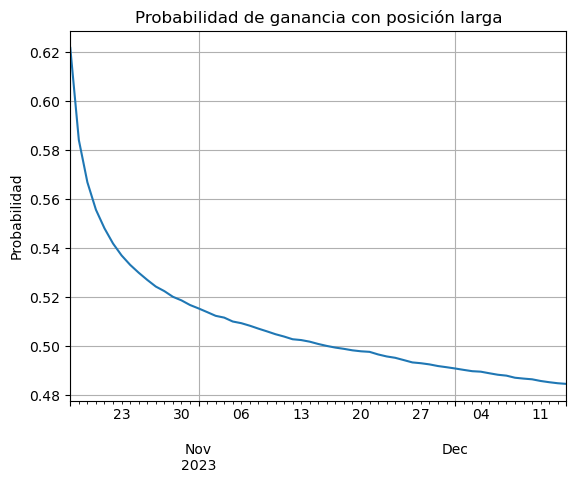

In [21]:
valor_deseado = data[-1] * 0.996141
valor_deseado

sobrepasa = valor_deseado <= puntos_simulados
probabilidad = sobrepasa.mean(axis=1)

probabilidad.plot(grid=True)
plt.ylabel("Probabilidad")
plt.title("Probabilidad de ganancia con posición larga")

## **Resultados**

In [22]:
print("Según la simulación hecha, el valor de puntos para el S&P 500, el día 15 de diciembre de 2023 (día que expira el contrato) es de", puntos_15_12_23,
      "\nlo cuál es", (puntos_15_12_23 - 4356.75), "puntos por encima del futuro pactado.\n\nEl contrato de futuros sobre el S&P 500 ofrecido por CME tiene un costo de "
      "$50 dólares por punto del índice, por lo que se estaría ganando una cantidad de\n$",(puntos_15_12_23 - 4356.75)*50, "al invertir $",4356.75*50, "\n\nLa simulación "
      "de 1,000,000 casos de los proximos 2 meses, nos dice que hay una probabilidad del", probabilidad[-1]*100,"%, de que se obtenga una ganancia con una posición larga.")

Según la simulación hecha, el valor de puntos para el S&P 500, el día 15 de diciembre de 2023 (día que expira el contrato) es de 4360.331052174284 
lo cuál es 3.5810521742841956 puntos por encima del futuro pactado.

El contrato de futuros sobre el S&P 500 ofrecido por CME tiene un costo de $50 dólares por punto del índice, por lo que se estaría ganando una cantidad de
$ 179.05260871420978 al invertir $ 217837.5 

La simulación de 1,000,000 casos de los proximos 2 meses, nos dice que hay una probabilidad del 48.446600000000004 %, de que se obtenga una ganancia con una posición larga.


## **Conclusiones**
- La simulación que hicimos es bastante similar al numero de puntos pactado en el contrato de futuros de CME group.
- Se tiene que invertir una gran cantidad de dinero ($ 217,837.5 USD) para obtener una ganancia de alrededor de 200 USD, lo que representa el 0.0918% aproximadamente.
- Es muy grande el riesgo que se tiene en la inversión, ya que, con base en la simulación hay solamente un, aproximadamente, 48.5% de probabilidad de obtener ganancias con una posición larga.
- No es posible hacer especulación con un futuro sobre un índice, sino que éstos son aptos para hacer cobertura.



## **Referencias**
- Hull, J. (2009). Introducción a los mercados de futuros y opciones.
- Futures & Options trading for Risk Management - CME Group. (s. f.). https://www.cmegroup.com/markets/equities/sp/e-mini-sandp500.timeAndSales.html